# Performing EDA and Pre-processing on the Dataset

## Loading required packages

In [1]:
import json
import os
import pickle
import re
import string
import sys
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nltk
import fire
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

## Preprocessing the data

In [3]:
DATA_DIR = "data/"

In [4]:
with open(DATA_DIR + "arxivData.json", "r") as fp:
    data = json.load(fp)

In [5]:
def str_to_list(x):
    """
        Converting string enclosed lists to a python list
    """
    for i in range(len(x)):
        x[i]["author"] = eval(x[i]["author"])
        x[i]["tag"] = eval(x[i]["tag"])

In [6]:
str_to_list(data)

## Data Visualization

* Papers published per year

In [7]:
pap_year = {}
for i in range(len(data)):
    if data[i]['year'] not in pap_year:
        pap_year[data[i]['year']] = 0
    else:
        pap_year[data[i]['year']] += 1

In [8]:
sorted_ycount = sorted(pap_year.items(), key=operator.itemgetter(0), reverse=False)

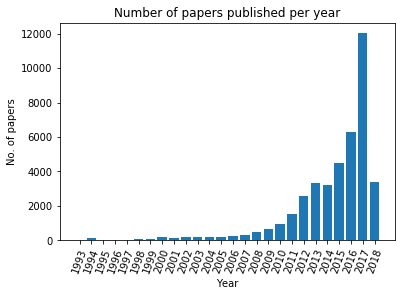

In [9]:
plt.bar(
    [str(x[0]) for x in sorted_ycount],
    [x[1] for x in sorted_ycount],
)
plt.xticks(rotation=70)
plt.title("Number of papers published per year")
plt.xlabel("Year")
plt.ylabel("No. of papers")
plt.show()

Clearly Year **2017** has witnessed highest number of computer science papers publication

* Visualizing the **top ten frequently** occuring tags

In [10]:
tags = {}
for i in range(len(data)):
    for j in range(len(data[i]["tag"])):
        if data[i]["tag"][j]['term'] not in tags.keys():
            tags[data[i]["tag"][j]['term']] = 0
        else:
            tags[data[i]["tag"][j]['term']] += 1

In [11]:
sorted_tags = sorted(tags.items(), key=operator.itemgetter(1), reverse=True)
popular_tags = sorted_tags[0:10].copy()
popular_tags.reverse()

In [12]:
master_tags = {
    "cs.CV" : "Computer Vision and Pattern Recognition",
    "cs.LG" : "Machine Learning",
    "cs.AI" : "Artificial Intelligence",
    "stat.ML" : "Statistical Learning",
    "cs.CL" : "Computational Language",
    "cs.NE" : "Neural and Evolutionary Computing",
    "cs.IR" : "Information Retrieval",
    "math.OC" : "Optimization and Control",
    "cs.RO" : "Robotics",
    "cs.LO" : "Logic in Computer Science",
}

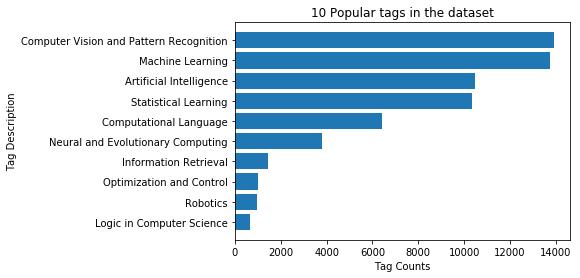

In [14]:
plt.barh(
    [master_tags[x[0]] for x in popular_tags[0:10]],
    [x[1] for x in popular_tags[0:10]],
)
plt.title("10 Popular tags in the dataset")
plt.xlabel("Tag Counts")
plt.ylabel("Tag Description")
plt.show()

* Visualizing the **top ten frequently occuring words** in abstract of each research paper available in dataset.

In [97]:
summaries = list(map(lambda x:x["summary"], data))
text_summ = ' '.join(summaries)

In [98]:
def preprocess_text(text, stemmer=PorterStemmer(), esc_dict=esc_dict):
    """
        Text data preprocessing for performing analysis.
    """
    # Converting all the letters to lowercase
    text = text.lower()
    # Removing numbers from the text
    text = re.sub(r"\d+", "", text)
    # Removing punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove escape characters
    text = text.translate(esc_dict)
    # Removing trailing and leading whitespaces
    text = text.strip(" ")
    # Removing stop words
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filt_sum = [w for w in word_tokens if w not in stop_words]


    return filt_sum

In [99]:
final_words = preprocess_text(text_summ)
fdist = nltk.FreqDist(final_words)

In [100]:
top_words = fdist.most_common(10)
top_words.reverse()

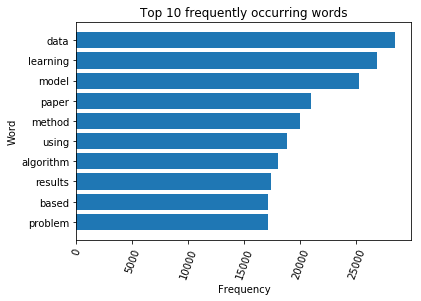

In [101]:
plt.barh(
    [x[0] for x in top_words],
    [x[1] for x in top_words],
)
plt.xticks(rotation=70)
plt.title("Top 10 frequently occurring words")
plt.ylabel("Word")
plt.xlabel("Frequency")
plt.show()